Observations and Insights

Visualizing the data in the figures below helps to illustrate the efficacy of the drug Capomulin at reducing the growth of SCC tumors. During the study's 45 day timeframe, the Capomulin treatment group incurred less mice deaths than the other groups, with the exception of the Ramicane group. The Capomulin group also completed the study with, on average, lower tumor volumes (mm3) than the other groups, again with the exception of the Ramicane group which nearly mirrored the final tumor volumes of the Capomulin mice. When the average tumor volume (mm3) of 'Mouse s185' was measured over the course of the study, the tumor consistently reduced in size as the mouse received the Capomulin drug. Finally, the average tumor volume (mm3) of the Capomulin mice correlated strongly with their weight.    


In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Visualize preview of both data sets
# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [88]:
# Checking the number of mice.
len(complete_df['Mouse ID'].unique())

249

In [89]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_df.loc[complete_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = complete_df.loc[complete_df['Mouse ID'] == 'g989']
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df.loc[(complete_df['Mouse ID'] != 'g989')]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df['Tumor Volume (mm3)'].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [94]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_stdev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 
                           'Median Tumor Volume': tumor_median, 
                           'Tumor Volume Variance': tumor_variance, 
                           'Tumor Volume Std. Dev': tumor_stdev, 
                           'Tumor Volume SEM': tumor_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

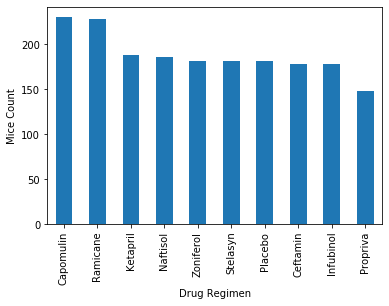

In [96]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = clean_df['Drug Regimen'].value_counts()
total_mice.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

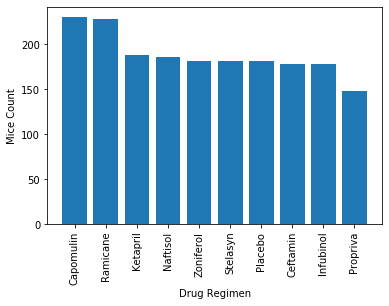

In [97]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(total_mice.index.values, total_mice.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

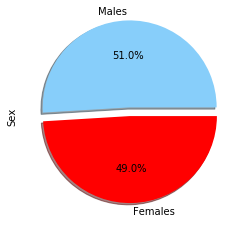

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_df['Sex'].value_counts()

# Labels for each section of the pie chart
labels = ['Males', 'Females']

# Colors of each section of the pie chart
colors = ['lightskyblue', 'red']

# Tells matplotlib to seperate the "Males" section from the "Females"
explode = (0.1, 0)

# Create the pie chart based upon the values above
sex_count.plot(kind='pie', explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

([<matplotlib.patches.Wedge at 0x7fc4ad39cb90>,
 [Text(-0.03608946990830779, 1.1994571897995099, 'Males'),
  Text(0.033082014082615095, -1.0995024239828841, 'Females')],
 [Text(-0.021052190779846207, 0.6996833607163808, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

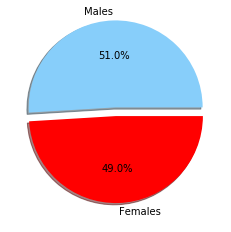

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_volume = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_volume = final_volume.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = final_volume.merge(clean_df, how='left', on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug} outliers are: {outliers}")

Capomulin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


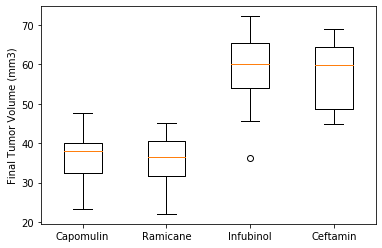

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

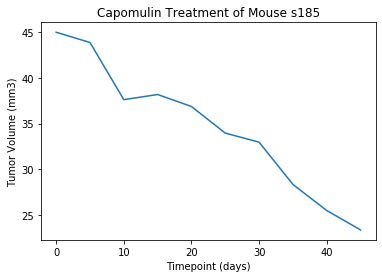

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_only = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# capomulin_only.head()

mouse_data = capomulin_only.loc[capomulin_only['Mouse ID'] == 's185']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

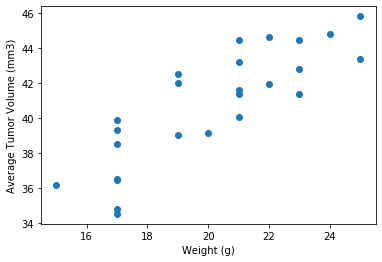

In [118]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_averages = capomulin_only.groupby('Mouse ID').mean()
# capomulin_averages.head()
plt.scatter(capomulin_averages['Weight (g)'], capomulin_averages['Tumor Volume (mm3)'])
plt.title('')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_averages['Weight (g)'], capomulin_averages['Tumor Volume (mm3)'])
print(f'The correlation coefficient for mouse weight and average tumor volume is {round(correlation[0],2)}.')

The correlation coefficient for mouse weight and average tumor volume is 0.84.


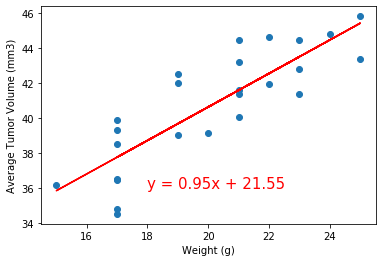

In [115]:
x_values = capomulin_averages['Weight (g)']
y_values = capomulin_averages['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()